In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [213]:
df = pd.read_csv("Dataset_spine-1.csv")
print(df.head())
print(df.tail())


        Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                 

In [215]:
df.shape

(310, 14)

In [217]:
df.info

<bound method DataFrame.info of           Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0   

In [219]:
df.isnull().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [221]:
df.isnull().sum()/df.shape[0] * 100

Col1            0.000000
Col2            0.000000
Col3            0.000000
Col4            0.000000
Col5            0.000000
Col6            0.000000
Col7            0.000000
Col8            0.000000
Col9            0.000000
Col10           0.000000
Col11           0.000000
Col12           0.000000
Class_att       0.000000
Unnamed: 13    95.483871
dtype: float64

In [223]:
df.duplicated().sum()

0

In [225]:
df.drop(columns=['Unnamed: 13'], inplace=True)


In [227]:
df.isnull().sum()/df.shape[0] * 100

Col1         0.0
Col2         0.0
Col3         0.0
Col4         0.0
Col5         0.0
Col6         0.0
Col7         0.0
Col8         0.0
Col9         0.0
Col10        0.0
Col11        0.0
Col12        0.0
Class_att    0.0
dtype: float64

In [229]:
print(df.head())

        Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal  
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal  
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal  
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal  
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal  


In [231]:
COLUMN_NAMES = [
    "pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope",
    "pelvic_radius", "degree_spondylolisthesis", "pelvic_slope", "direct_tilt",
    "thoracic_slope", "cervical_tilt", "sacrum_angle", "scoliosis_slope", "class_label"
]
 
df.columns = COLUMN_NAMES

In [233]:
print(df.head())


   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope class_label  
0         14.5386       15.30468    -28.6585

In [235]:
print(df.columns)


Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class_label'],
      dtype='object')


In [237]:
print(df.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope class_label  
0         14.5386       15.30468    -28.6585

In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [241]:
print(df["class_label"].unique())


['Abnormal' 'Normal']


In [249]:
df.describe(include = "object") 

,class_label
count,310
unique,2
top,Abnormal
freq,210


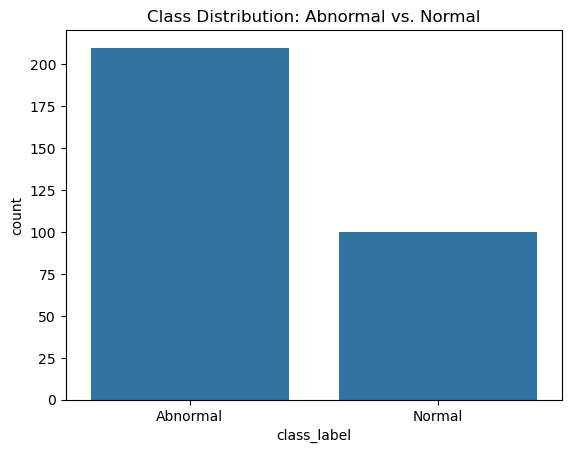

In [251]:
sns.countplot(x=df["class_label"])
plt.title("Class Distribution: Abnormal vs. Normal")
plt.show()

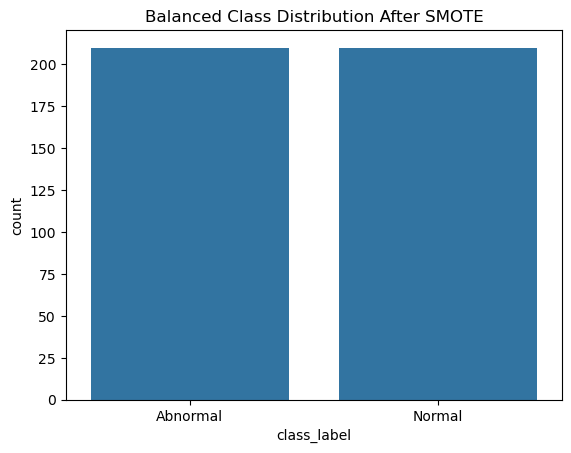

In [253]:
X = df.drop("class_label", axis=1)
y = df["class_label"]

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution After SMOTE")
plt.show()

In [255]:
df.describe(include = "object") 

,class_label
count,310
unique,2
top,Abnormal
freq,210


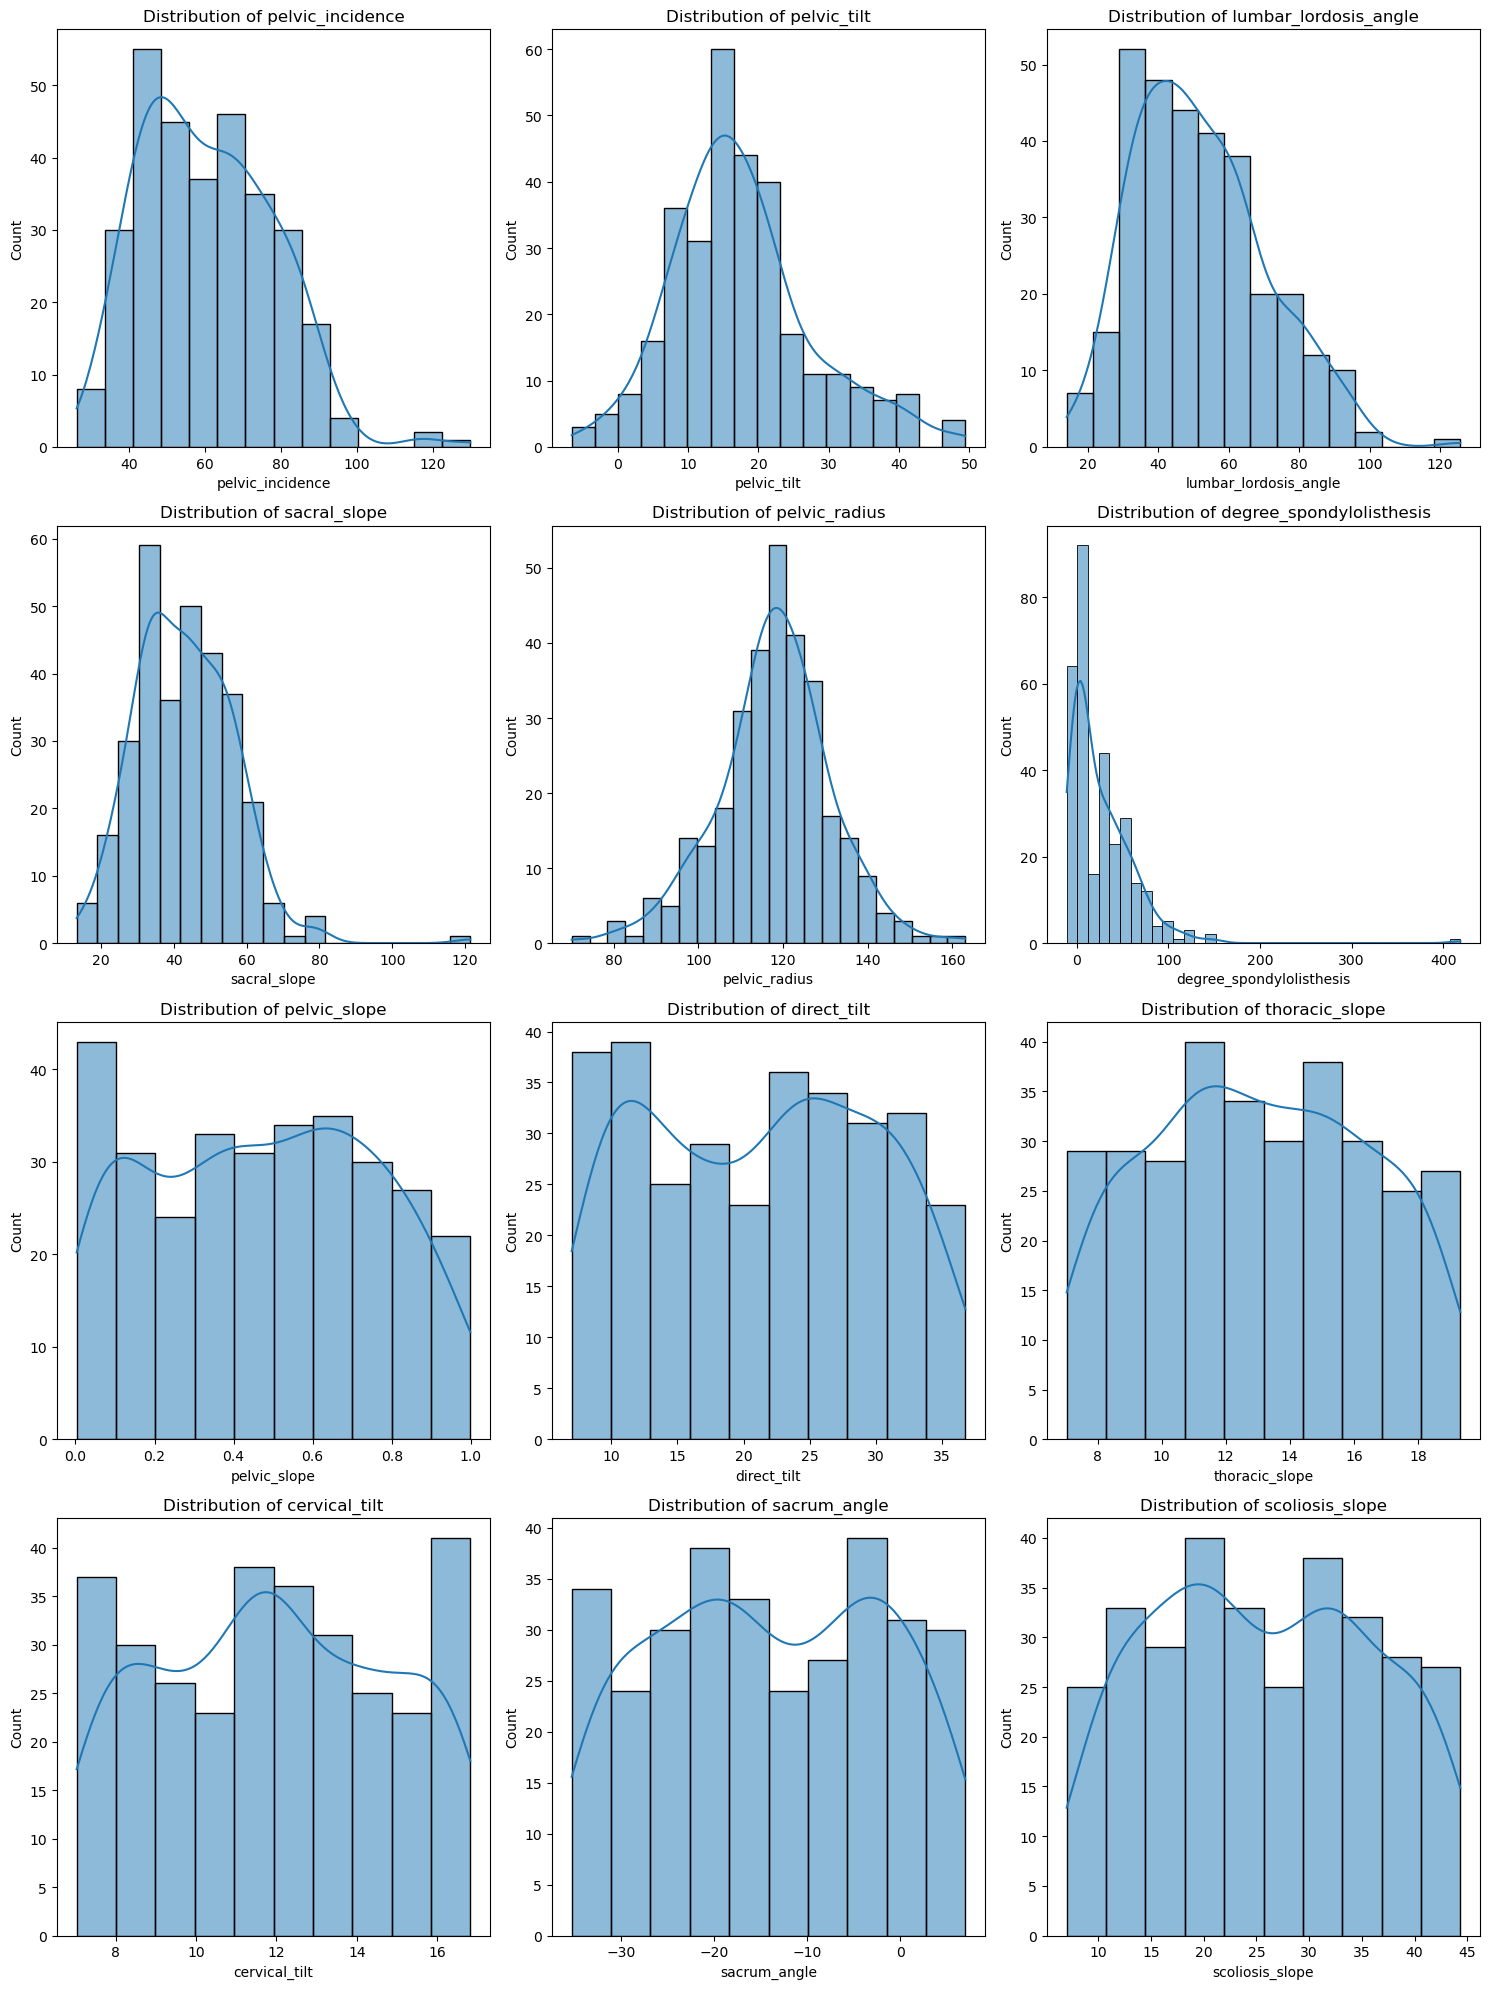

In [259]:


# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Define the number of rows and columns for subplots
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust rows dynamically for 3 columns

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

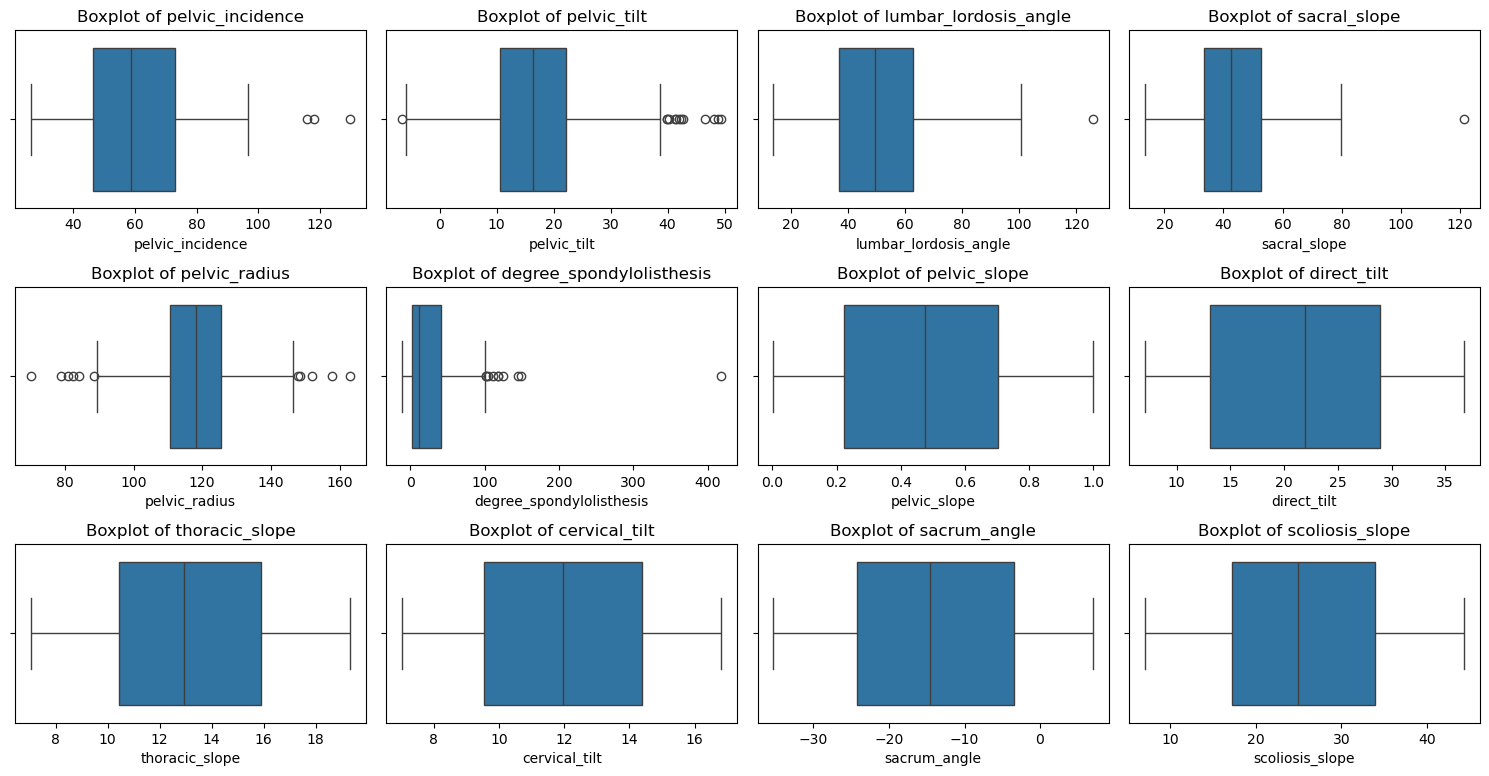

In [261]:
# Set figure size
plt.figure(figsize=(15, 10))

# Loop through all numerical columns
for i, column in enumerate(df.select_dtypes(include="number").columns, 1):
    plt.subplot(4, 4, i)  # Create a 4x4 grid of subplots
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot of {column}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

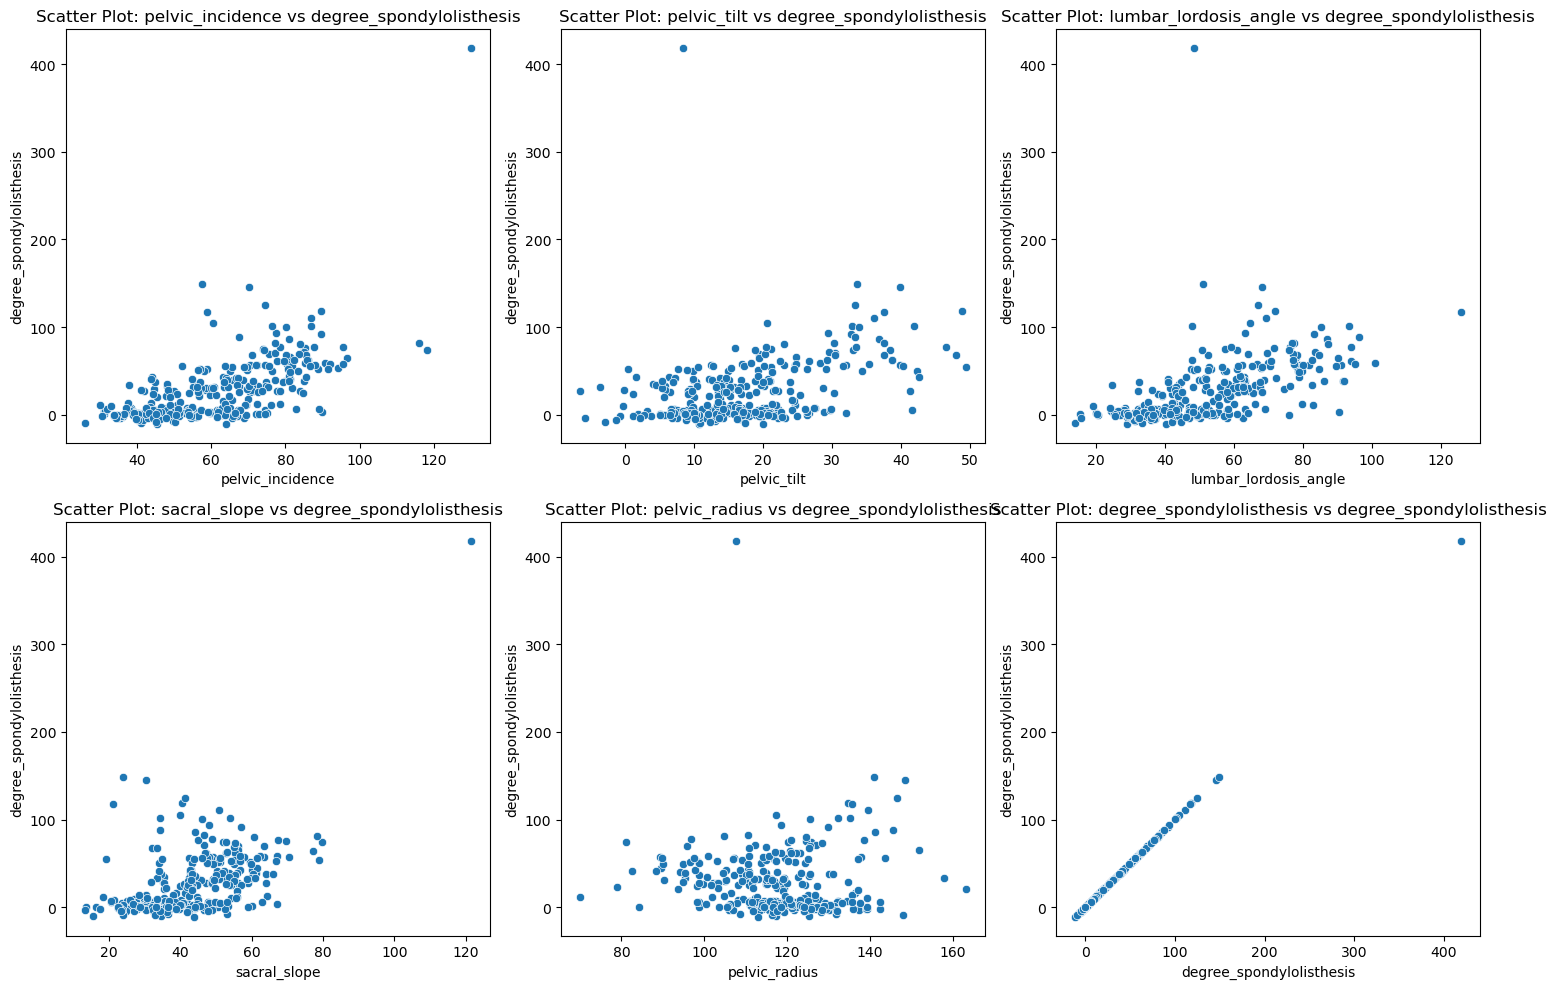

In [263]:
# Assuming df is your dataframe
numerical_columns = df.select_dtypes(include=["number"]).columns

# Creating scatter plots for each pair of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Plot only first 6 pairs to avoid too many plots
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[col], y=df["degree_spondylolisthesis"])  # Adjust based on target variable
    plt.xlabel(col)
    plt.ylabel("degree_spondylolisthesis")
    plt.title(f"Scatter Plot: {col} vs degree_spondylolisthesis")

plt.tight_layout()
plt.show()

In [265]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class_label                 0
dtype: int64

In [287]:
import numpy as np

# Function to remove extreme outliers using a more aggressive IQR threshold
def remove_outliers(df, column):
    """Removes extreme outliers using an IQR threshold of 2.5x instead of 1.5x."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR  # More aggressive threshold
    upper_bound = Q3 + 2.5 * IQR
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply aggressive outlier removal ONLY to "degree_spondylolisthesis"
df_cleaned = remove_outliers(df_cleaned, "degree_spondylolisthesis")


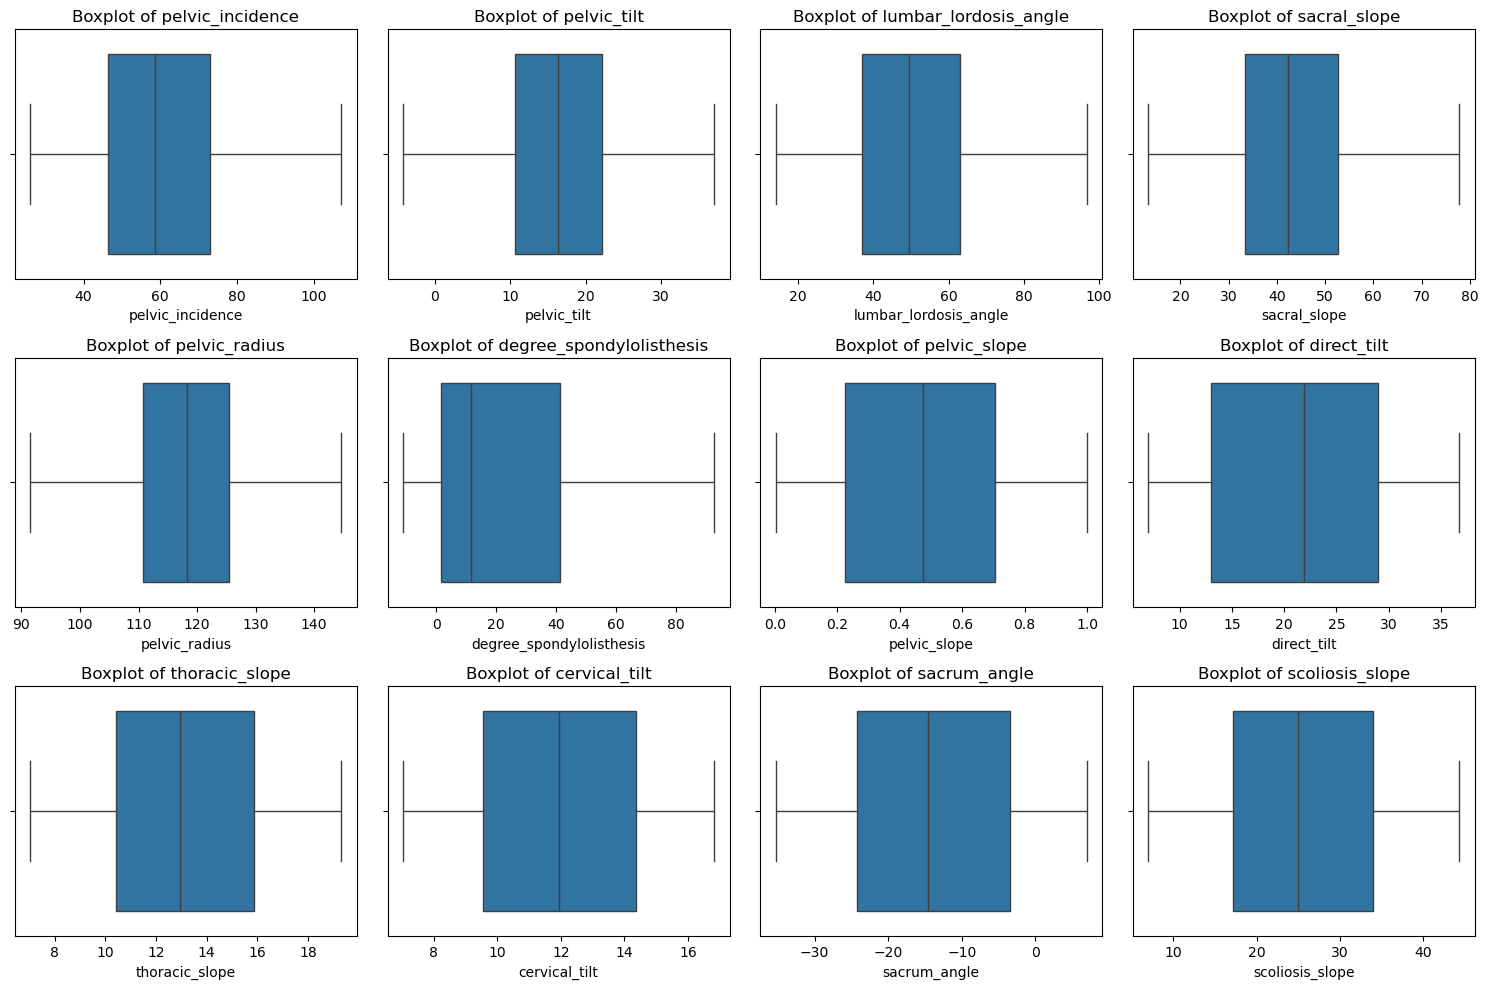

In [289]:
# Set figure size
plt.figure(figsize=(15, 10))

# Loop through all numerical columns and plot boxplots
for i, column in enumerate(df_cleaned.select_dtypes(include="number").columns, 1):
    plt.subplot(3, 4, i)  # Adjust grid layout as needed
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f"Boxplot of {column}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

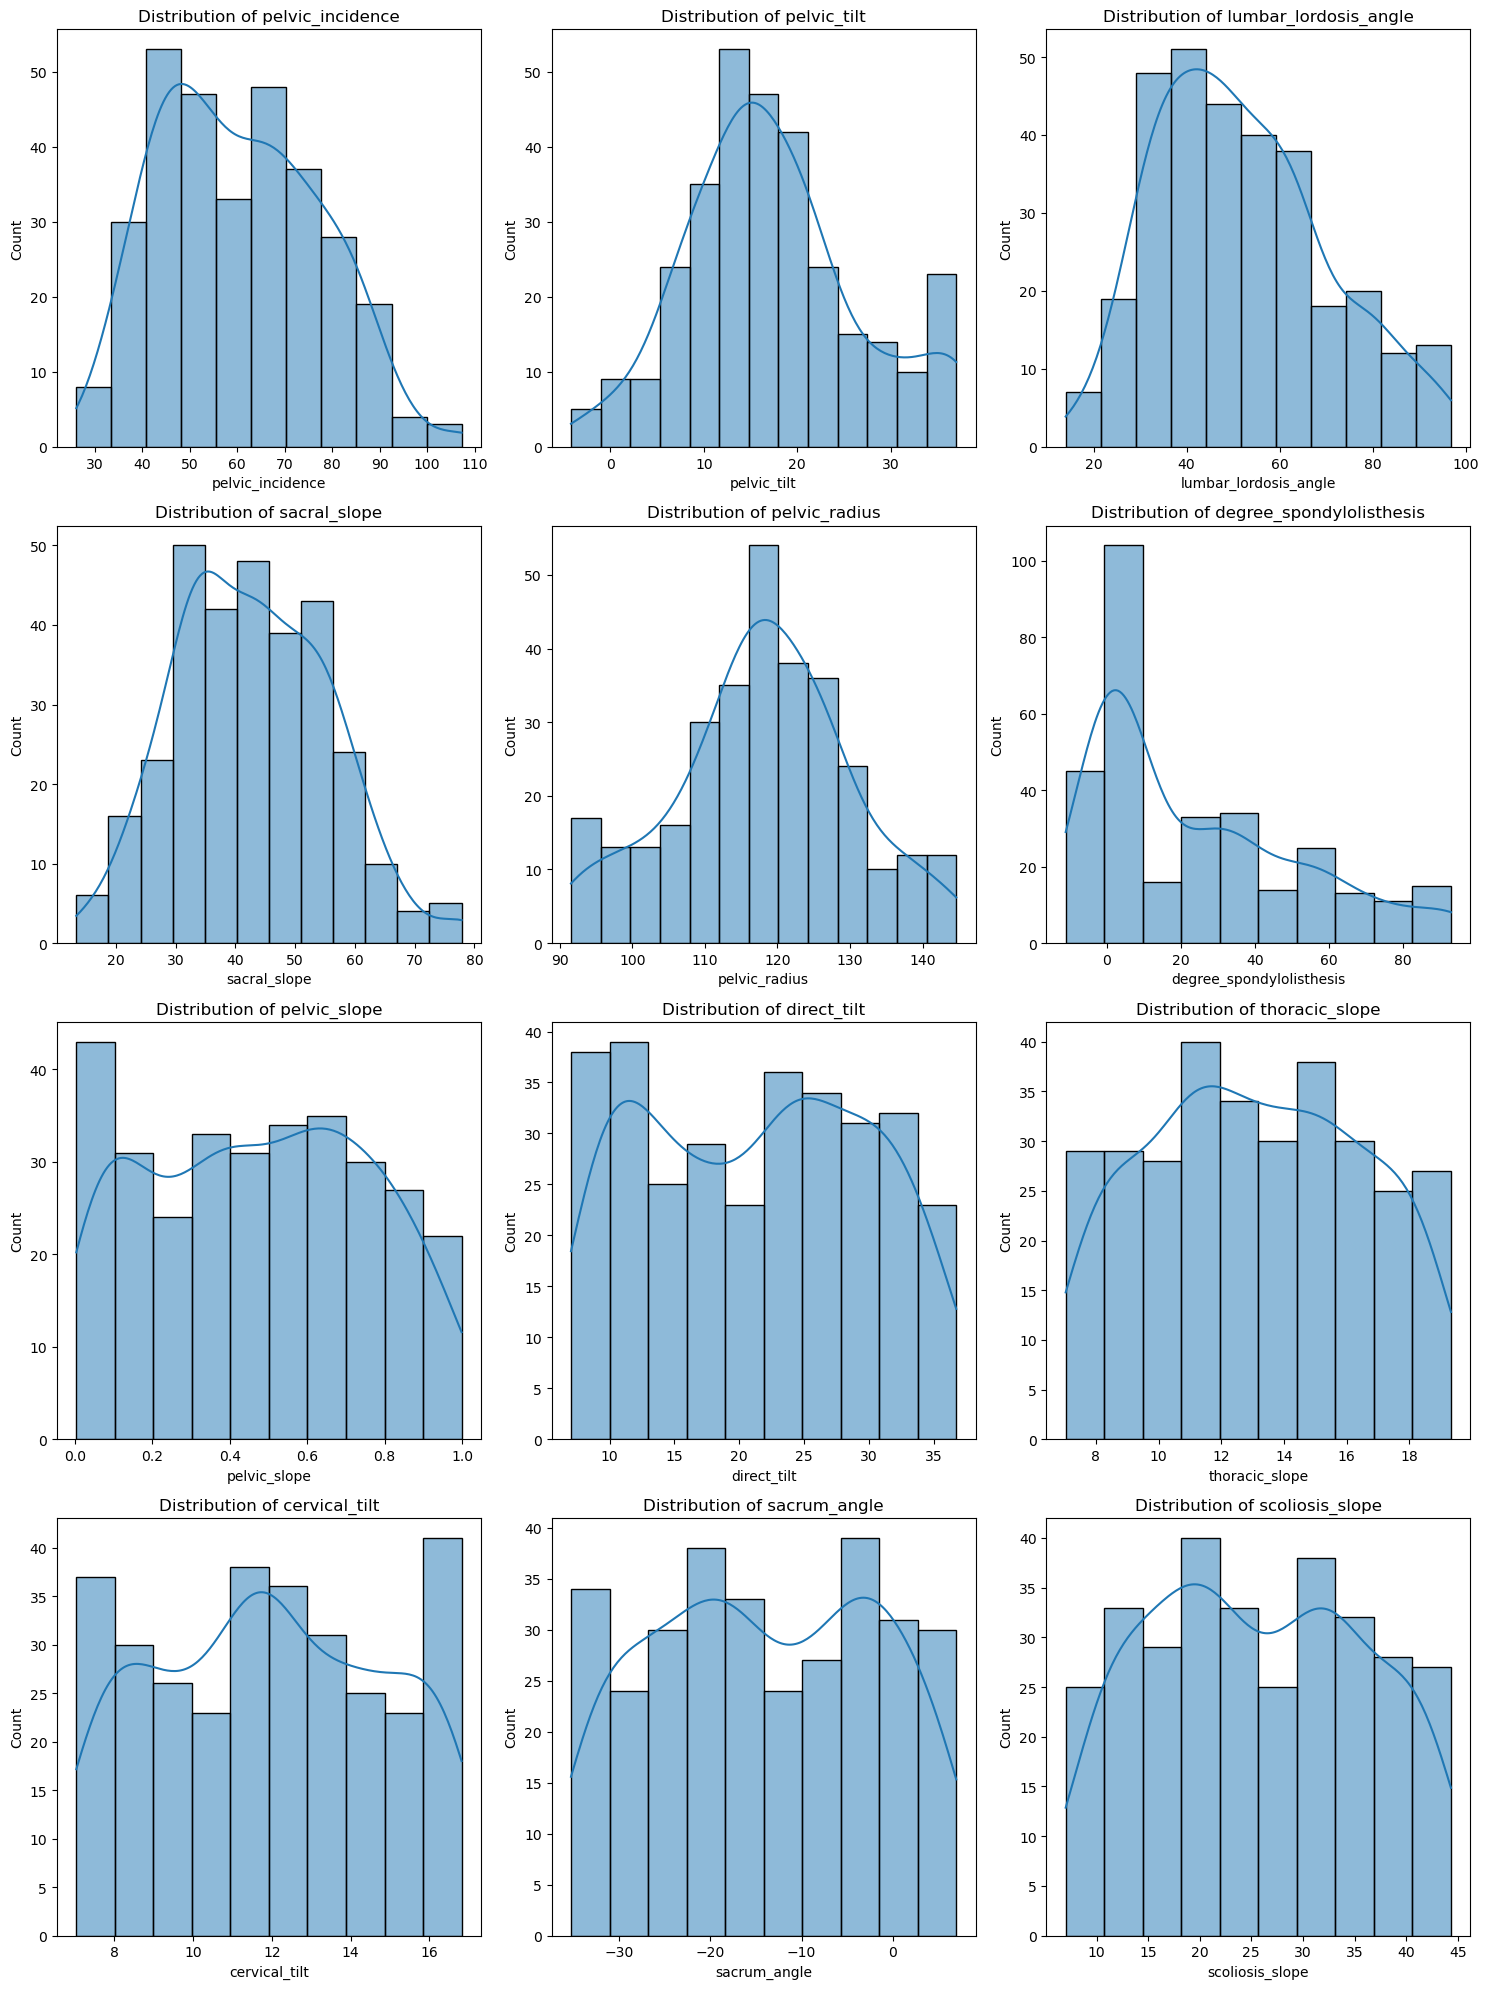

In [281]:
# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Define the number of rows and columns for subplots
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust rows dynamically for 3 columns

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(data=df_cleaned, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [291]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'class_label' column (Normal = 0, Abnormal = 1)
df_cleaned["class_label"] = label_encoder.fit_transform(df_cleaned["class_label"])

# Verify encoding
print(df_cleaned["class_label"].value_counts())  # Check the distribution
print(label_encoder.classes_)  # Print mapping (should be ['Abnormal', 'Normal'])


class_label
0    210
1    100
Name: count, dtype: int64
['Abnormal' 'Normal']


In [293]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features and target variable
X = df_cleaned.drop(columns=["class_label"])  # Independent variables
y = df_cleaned["class_label"]  # Target variable

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_cleaned = pd.DataFrame(X_resampled, columns=X.columns)
df_cleaned["class_label"] = y_resampled  # Add the balanced target column

# Verify the class distribution
print(df_cleaned["class_label"].value_counts())  # Should now be balanced


class_label
0    210
1    210
Name: count, dtype: int64


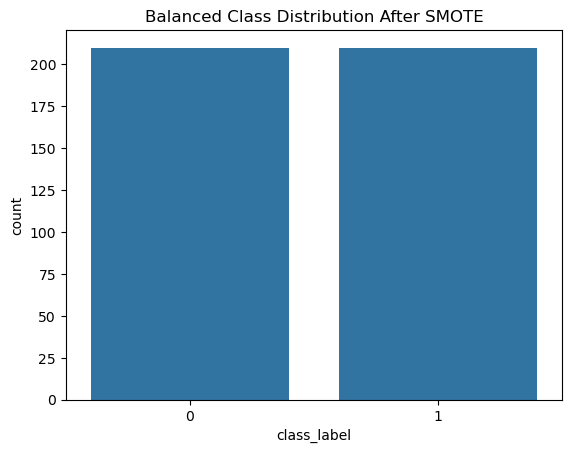

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_cleaned["class_label"])
plt.title("Balanced Class Distribution After SMOTE")
plt.show()


In [299]:
df_cleaned.to_csv("balanced_spine_data.csv", index=False)
